# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import statsmodels.formula.api as sm
import time
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Create settings dictionary
dictStgs = {'units': 'imperial', 'appid': api_key}

# Output File (CSV)
strOutput = "output_data/cities.csv"

# Range of latitudes and longitudes
tupLatRng = (-90, 90)
tupLngRng = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lstCoord = []
lstCity = []

# Create a set of random lat and lng combinations
lstLat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lstLng = np.random.uniform(low=-180.000, high=180.000, size=1500)
ltupCoord = zip(lstLat, lstLng)

# Identify nearest city for each lat, lng combination
for tupLatLng in ltupCoord:
    strCity = citipy.nearest_city(tupLatLng[0], tupLatLng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if strCity not in lstCity:
        lstCity.append(strCity)

# Print the city count to confirm sufficient count
len(lstCity)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# check weather in each city
lstCityWthr = []
for i in range(len(lstCity)):
    strCity = lstCity[i]
    try:
        dictResult = owm.get_current(strCity, **dictStgs)
        lstCityWthr.append(dictResult)
        strID = dictResult['id']
        print(f'{str(i).zfill(3)}) Just retrieved weather for {strCity} (ID {strID}).')
    except Exception as e:
        lstCityWthr.append('#N/A')
        print(f'{str(i).zfill(3)}) Couldn\'t retrieve weather for {strCity} ({e}).')

000) Couldn't retrieve weather for huazolotitlan (HTTP Error 404: Not Found).
001) Just retrieved weather for grand gaube (ID 934479).
002) Couldn't retrieve weather for kazalinsk (HTTP Error 404: Not Found).
003) Just retrieved weather for saint-cyr-sur-loire (ID 2980935).
004) Just retrieved weather for marathon (ID 6065867).
005) Couldn't retrieve weather for silyanah (HTTP Error 404: Not Found).
006) Just retrieved weather for vaini (ID 1273574).
007) Just retrieved weather for novoukrainskiy (ID 517769).
008) Just retrieved weather for mecca (ID 104515).
009) Just retrieved weather for bredasdorp (ID 1015776).
010) Just retrieved weather for barrow (ID 3833859).
011) Just retrieved weather for jalu (ID 86049).
012) Just retrieved weather for ushuaia (ID 3833367).
013) Couldn't retrieve weather for illoqqortoormiut (HTTP Error 404: Not Found).
014) Just retrieved weather for lompoc (ID 5367788).
015) Just retrieved weather for jamestown (ID 2069194).
016) Just retrieved weather for

141) Just retrieved weather for port alfred (ID 964432).
142) Just retrieved weather for ponta do sol (ID 3453439).
143) Just retrieved weather for necochea (ID 3430443).
144) Just retrieved weather for klyuchi (ID 1503153).
145) Just retrieved weather for new norfolk (ID 2155415).
146) Just retrieved weather for sinnamary (ID 3380290).
147) Just retrieved weather for buin (ID 3897774).
148) Just retrieved weather for pasighat (ID 1260206).
149) Just retrieved weather for puerto del rosario (ID 2512186).
150) Just retrieved weather for lithgow (ID 2160053).
151) Just retrieved weather for bambous virieux (ID 1106677).
152) Couldn't retrieve weather for grand river south east (HTTP Error 404: Not Found).
153) Just retrieved weather for guiratinga (ID 3461733).
154) Just retrieved weather for dikson (ID 1507390).
155) Just retrieved weather for provideniya (ID 4031574).
156) Just retrieved weather for saint marys (ID 5210117).
157) Just retrieved weather for harper (ID 4696310).
158) Jus

286) Just retrieved weather for vallenar (ID 3868633).
287) Just retrieved weather for aswan (ID 359792).
288) Couldn't retrieve weather for bargal (HTTP Error 404: Not Found).
289) Just retrieved weather for filadelfia (ID 3867291).
290) Just retrieved weather for bure (ID 2317887).
291) Just retrieved weather for cognac (ID 3024440).
292) Just retrieved weather for booue (ID 2401495).
293) Just retrieved weather for kiunga (ID 2093846).
294) Just retrieved weather for wyndham (ID 2639447).
295) Just retrieved weather for salisbury (ID 2638664).
296) Just retrieved weather for annapolis (ID 4347242).
297) Couldn't retrieve weather for palabuhanratu (HTTP Error 404: Not Found).
298) Just retrieved weather for acapulco (ID 3533462).
299) Just retrieved weather for nyimba (ID 900056).
300) Just retrieved weather for gizo (ID 6693679).
301) Just retrieved weather for ler (ID 3146125).
302) Just retrieved weather for paamiut (ID 3421193).
303) Just retrieved weather for gat (ID 2249901).
3

430) Couldn't retrieve weather for maneadero (HTTP Error 404: Not Found).
431) Just retrieved weather for nicoya (ID 3622716).
432) Just retrieved weather for esneux (ID 2798636).
433) Just retrieved weather for xuanhua (ID 2033574).
434) Just retrieved weather for whitehorse (ID 6180550).
435) Just retrieved weather for wanlaweyn (ID 50672).
436) Just retrieved weather for ferrol (ID 3123493).
437) Just retrieved weather for lewisville (ID 4706057).
438) Just retrieved weather for pontarlier (ID 2986302).
439) Couldn't retrieve weather for angra (HTTP Error 404: Not Found).
440) Just retrieved weather for miraflores (ID 3947322).
441) Just retrieved weather for giyon (ID 336372).
442) Just retrieved weather for chapais (ID 5919850).
443) Just retrieved weather for yichun (ID 2033413).
444) Just retrieved weather for mastic beach (ID 5126209).
445) Just retrieved weather for kanungu (ID 232287).
446) Just retrieved weather for samfya (ID 899274).
447) Just retrieved weather for north p

576) Just retrieved weather for banfora (ID 2362909).
577) Just retrieved weather for coolum beach (ID 2170581).
578) Just retrieved weather for lundazi (ID 909299).
579) Just retrieved weather for boden (ID 606531).
580) Just retrieved weather for lahaina (ID 5849996).
581) Just retrieved weather for yarmouth (ID 6185217).
582) Just retrieved weather for oranjestad (ID 3577154).
583) Just retrieved weather for jinotega (ID 3618929).
584) Couldn't retrieve weather for barawe (HTTP Error 404: Not Found).
585) Just retrieved weather for wuwei (ID 1803936).
586) Just retrieved weather for andros town (ID 3572906).
587) Just retrieved weather for gornopravdinsk (ID 1506268).
588) Couldn't retrieve weather for tuggurt (HTTP Error 404: Not Found).
589) Just retrieved weather for aykhal (ID 2027296).
590) Just retrieved weather for cairns (ID 2172797).
591) Just retrieved weather for roebourne (ID 2062276).
592) Just retrieved weather for rostovka (ID 1496153).
593) Just retrieved weather for

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create & populate dataframe
dfCityWthr = pd.DataFrame(columns=['ID', 'Name', 'Country', 'Lat', 'Lng', 'CurrCond', \
                                   'TempF', 'Hum', 'Cloud', 'WindSpd', 'DateTime'])
i = 0
for var in lstCityWthr:
    if var != '#N/A':
        dfCityWthr.loc[i] = [var['id'], var['name'], var['sys']['country'], var['coord']['lat'], \
                             var['coord']['lon'], var['weather'][0]['main'], var['main']['temp'], \
                             var['main']['humidity'], var['clouds']['all'], var['wind']['speed'], \
                             var['dt']]
        i += 1

In [28]:
# inspect dataframe
dfCityWthr.head()

,ID,Name,Country,Lat,Lng,CurrCond,TempF,Hum,Cloud,WindSpd,DateTime,EqtrDist
0,934479,Grand Gaube,MU,-20.01,57.66,Rain,72.70,78.0,75,10.29,1562138782,1384.692
1,2980935,Saint-Cyr-sur-Loire,FR,47.41,0.67,Clear,64.04,63.0,0,10.29,1562138782,3280.772
2,6065867,Marathon,CA,48.72,-86.38,Clouds,52.86,73.0,22,5.44,1562138783,3371.424
3,1273574,Vaini,IN,15.34,74.49,Clouds,78.80,78.0,75,13.87,1562138783,1061.528
4,517769,Novoukrainskiy,RU,44.89,38.05,Clear,78.58,74.0,0,4.47,1562138783,3106.388


In [7]:
# drop NAs
dfCityWthr = dfCityWthr.dropna(how='any')

In [27]:
# change Hum and Cloud to float
for ind, val in enumerate(dfCityWthr['Cloud']):
    dfCityWthr.loc[ind, 'Cloud'] = float(val)
for ind, val in enumerate(dfCityWthr['Hum']):
    dfCityWthr.loc[ind, 'Hum'] = float(val)

In [8]:
# compute Distance from Equator (mi) (see http://bit.ly/latitudetomiles)
dfCityWthr['EqtrDist'] = abs(dfCityWthr['Lat']) * 69.2

In [9]:
# save dataframe
dfCityWthr.to_csv('City Weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# define a function to generate the graphs
def Plotter(strTitle='Latitude vs Temperature', strFile='Lat vs Temp.png', \
            strXLbl='Latitude (Degrees)', strYLbl='Temperature (°F)', \
            strX='Lat', strY='TempF', \
            intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
            intYBound1=20, intYBound2=32, intYBound3=80, intYBound4=120, \
            strColLow='blue', strColMid='green', strColHi='red', df=dfCityWthr):
    # create Low, Mid, Hi lists of X and Y vals:
    lstLowX = df.loc[df[strY] < intYBound2][strX]
    lstLowY = df.loc[df[strY] < intYBound2][strY]
    lstMidX = df.loc[(df[strY] >= intYBound2) & (df[strY] < intYBound3)][strX]
    lstMidY = df.loc[(df[strY] >= intYBound2) & (df[strY] < intYBound3)][strY]
    lstHiX  = df.loc[df[strY] >= intYBound3][strX]
    lstHiY  = df.loc[df[strY] >= intYBound3][strY]
    # create scatterplot
    plt.scatter(lstLowX, lstLowY, marker='o', facecolors=strColLow, alpha=0.75)
    plt.scatter(lstMidX, lstMidY, marker='o', facecolors=strColMid, alpha=0.75)
    plt.scatter(lstHiX, lstHiY, marker='o', facecolors=strColHi, alpha=0.75)
    plt.title(f'World Cities: {strTitle}\nAnalysis Started {time.ctime(min(dfCityWthr["DateTime"]))} CT')
    plt.xlabel(strXLbl)
    plt.ylabel(strYLbl)
    plt.xlim(intXBound1, intXBound4)
    plt.ylim(intYBound1, intYBound4)
    plt.grid(axis='both')
    plt.savefig(strFile)

#### Latitude vs. Temperature Plot

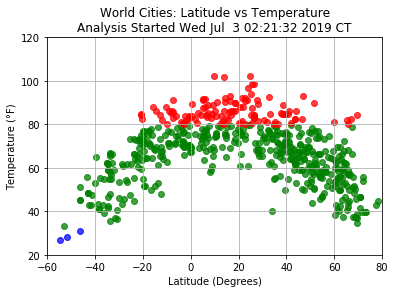

In [11]:
# create Lat vs Temp scatterplot
Plotter()

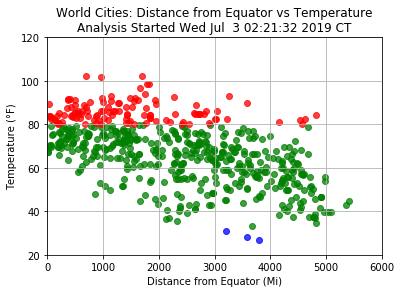

In [12]:
# create Dist vs Temp scatterplot
Plotter(strTitle='Distance from Equator vs Temperature', strFile='Dist vs Temp.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Temperature (°F)', \
        strX='EqtrDist', strY='TempF', \
        intXBound1=0, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=20, intYBound2=32, intYBound3=80, intYBound4=120, \
        strColLow='blue', strColMid='green', strColHi='red', df=dfCityWthr)

In [13]:
# run a regression on distance from equator
ols=sm.ols(formula='TempF~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  TempF   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     255.1
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           1.08e-47
Time:                        02:30:15   Log-Likelihood:                -2206.1
No. Observations:                 569   AIC:                             4416.
Df Residuals:                     567   BIC:                             4425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.4076      0.937     85.790      0.0

#### Latitude vs. Humidity Plot

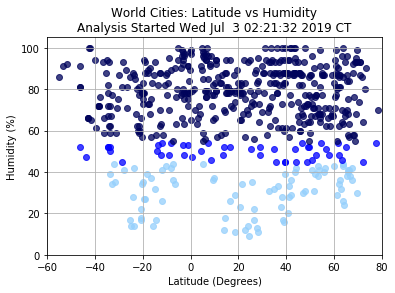

In [14]:
# create Lat vs Hum scatterplot
Plotter(strTitle='Latitude vs Humidity', strFile='Lat vs Hum.png', \
        strXLbl='Latitude (Degrees)', strYLbl='Humidity (%)', \
        strX='Lat', strY='Hum', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=45, intYBound3=55, intYBound4=105, \
        strColLow='xkcd:light blue', strColMid='blue', strColHi='xkcd:dark blue')

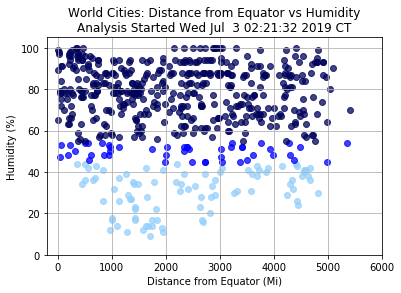

In [15]:
# create Dist vs Hum scatterplot
Plotter(strTitle='Distance from Equator vs Humidity', strFile='Dist vs Hum.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Humidity (%)', \
        strX='EqtrDist', strY='Hum', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=45, intYBound3=55, intYBound4=105, \
        strColLow='xkcd:light blue', strColMid='blue', strColHi='xkcd:dark blue')

In [26]:
# run a regression on distance from equator
ols=sm.ols(formula='Hum~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                    Hum   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.152
Date:                Wed, 03 Jul 2019   Prob (F-statistic):              0.284
Time:                        02:37:39   Log-Likelihood:                -2558.4
No. Observations:                 569   AIC:                             5121.
Df Residuals:                     567   BIC:                             5129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.1033      1.741     40.845      0.0

#### Latitude vs. Cloudiness Plot

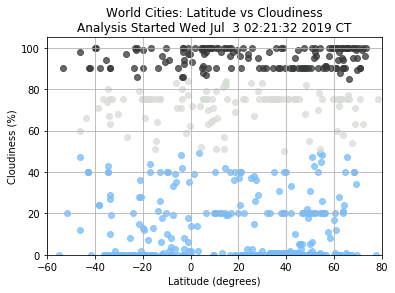

In [29]:
# create Lat vs Cloud scatterplot
# from https://openweathermap.org/weather-conditions : <50% is few/scattered clouds, >85% is overcast
Plotter(strTitle='Latitude vs Cloudiness', strFile='Lat vs Cloud.png', \
        strXLbl='Latitude (degrees)', strYLbl='Cloudiness (%)', \
        strX='Lat', strY='Cloud', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=50, intYBound3=85, intYBound4=105, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

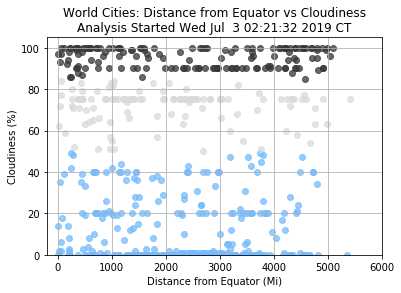

In [30]:
# create Dist vs Cloud scatterplot
# from https://openweathermap.org/weather-conditions : <50% is few/scattered clouds, >85% is overcast
Plotter(strTitle='Distance from Equator vs Cloudiness', strFile='Dist vs Cloud.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Cloudiness (%)', \
        strX='EqtrDist', strY='Cloud', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=50, intYBound3=85, intYBound4=105, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

In [31]:
# run a regression on distance from equator
ols=sm.ols(formula='Cloud~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cloud   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.001964
Date:                Wed, 03 Jul 2019   Prob (F-statistic):              0.965
Time:                        02:39:38   Log-Likelihood:                -2895.4
No. Observations:                 569   AIC:                             5795.
Df Residuals:                     567   BIC:                             5804.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.5156      3.148     14.777      0.0

#### Latitude vs. Wind Speed Plot

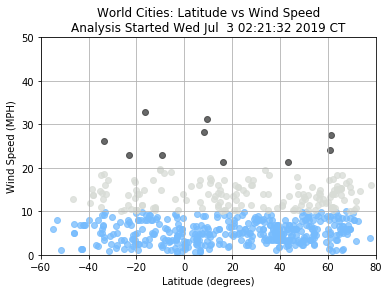

In [32]:
# create Lat vs Wind Speed scatterplot
Plotter(strTitle='Latitude vs Wind Speed', strFile='Lat vs Wind.png', \
        strXLbl='Latitude (degrees)', strYLbl='Wind Speed (MPH)', \
        strX='Lat', strY='WindSpd', \
        intXBound1=-60, intXBound2=0, intXBound3=0, intXBound4=80, \
        intYBound1=0, intYBound2=10, intYBound3=20, intYBound4=50, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

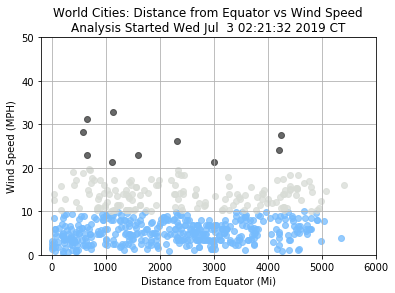

In [33]:
# create Dist vs Wind Speed scatterplot
Plotter(strTitle='Distance from Equator vs Wind Speed', strFile='Dist vs Wind.png', \
        strXLbl='Distance from Equator (Mi)', strYLbl='Wind Speed (MPH)', \
        strX='EqtrDist', strY='WindSpd', \
        intXBound1=-200, intXBound2=0, intXBound3=0, intXBound4=6000, \
        intYBound1=0, intYBound2=10, intYBound3=20, intYBound4=50, \
        strColLow='xkcd:sky blue', strColMid='xkcd:light gray', strColHi='xkcd:dark gray')

In [34]:
# run a regression on distance from equator
ols=sm.ols(formula='WindSpd~EqtrDist',data=dfCityWthr).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                WindSpd   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.498
Date:                Wed, 03 Jul 2019   Prob (F-statistic):             0.0194
Time:                        02:39:47   Log-Likelihood:                -1732.2
No. Observations:                 569   AIC:                             3468.
Df Residuals:                     567   BIC:                             3477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0798      0.408     17.371      0.0